In [1]:
# Import neccessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries (For Machine Learning Algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Model Deployment
import pickle
import streamlit as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Dictionary
- age - age of the patient in years
- sex - (1= male; 0= female)
- cp - chest pain type (1= typical angina; 2= atypical angina; 3= non-anginal pain; 4= asymptomatic)
- trestbps - resting blood pressure (in mmHg)
- chol - serum cholesterol (in mg/dl)
- fbs - fasting blood sugar (value >120mg/dl)(1= true; 0= false)
- restecg - resting electrocardiogram (1= normal, 0= abnormal)
- thalach - maximum heart rate achieved (in beats/min)
- exang - exercise induced angina (1= yes; 0= no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (0= downsloping; 1= Flat; 2= upsloping)
- ca - number of major vessels (scored 0-3)
- thal - patient had thalassemia defect or not (1= normal; 2= fixed defect; 3= reversible defect)
- target - patient had the disease or not (1= yes; 0= no)

In [3]:
# Rename features to easy to understand terms
df.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 
              'st_slope', 'no_of_major_vessels', 'thalassemia', 'target']
df

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Check minimum and maximum age

min_age = df['age'].min()
max_age = df['age'].max()

min_age, max_age

(np.int64(29), np.int64(77))

In [5]:
# Check mininum and maximum blood pressure

min_bp = df['resting_blood_pressure'].min()
max_bp = df['resting_blood_pressure'].max()

min_bp, max_bp

(np.int64(94), np.int64(200))

In [6]:
# Check minimum and maximum cholesterol
min_chol = df['cholesterol'].min()
max_chol = df['cholesterol'].max()

min_chol, max_chol

(np.int64(126), np.int64(564))

In [7]:
# Check minimum and maximum cholesterol
min_hr = df['max_heart_rate_achieved'].min()
max_hr = df['max_heart_rate_achieved'].max()

min_hr, max_hr

(np.int64(71), np.int64(202))

In [8]:
# Check minimum and maximum St Depression value
min_dep = df['st_depression'].min()
max_dep = df['st_depression'].max()

min_dep, max_dep

(np.float64(0.0), np.float64(6.2))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   resting_ecg              303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  no_of_major_vessels      303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [10]:
# Statistical analysis 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


age                        0
gender                     0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
no_of_major_vessels        0
thalassemia                0
target                     0
dtype: int64


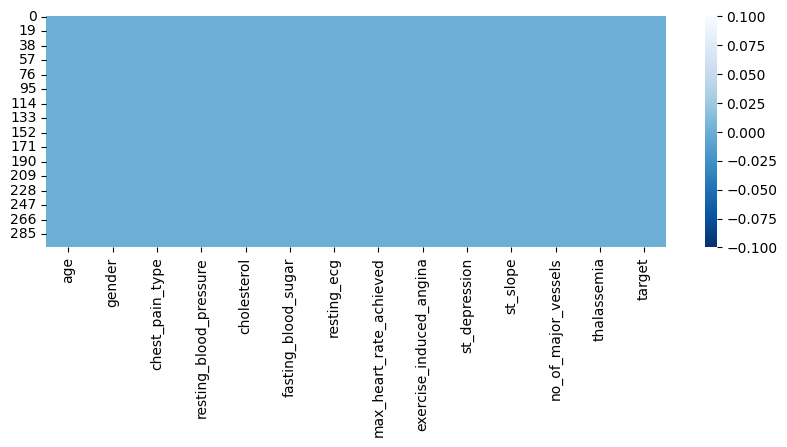

In [11]:
# Checkfor missing values and visualize the mmissing data

print(df.isnull().sum())

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

Exploratory Data Analysis

Univariate Analysis

In [12]:
list(df.columns)

['age',
 'gender',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'resting_ecg',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope',
 'no_of_major_vessels',
 'thalassemia',
 'target']

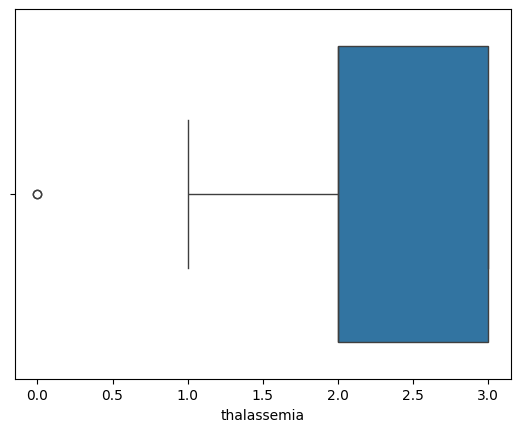

In [13]:
# Check for Outliers
sns.boxplot(x=df['thalassemia']);

From the above boxplot:
- Thalassemia IQR ranged between 2.0 and 3.0
- The median lied close to 2.5
- No higher outlier
- There was 1 lower outlier close to 0.0

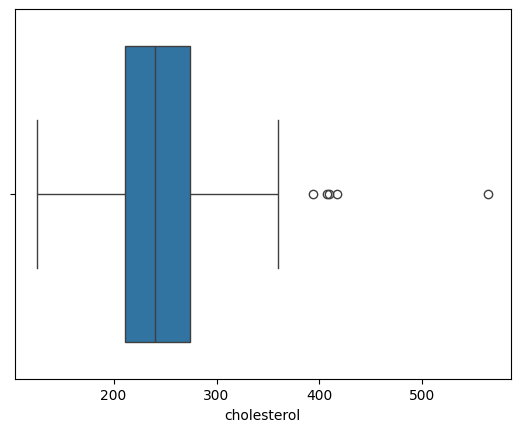

In [14]:
sns.boxplot(x=df['cholesterol']);

For Cholesterol, IQR ranged between just above 200 and below 300
- Median, around 250
- No lower outlier
- Upper ouliers around 400 and 600

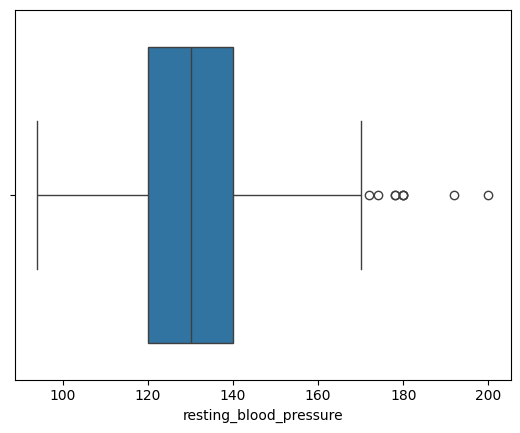

In [15]:
sns.boxplot(x=df['resting_blood_pressure']);

-There were 4 higher outliers between 700 and 200

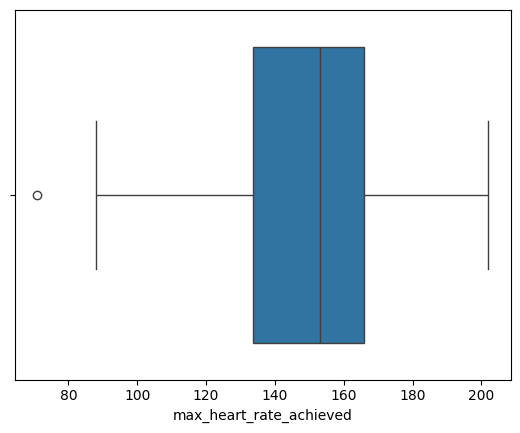

In [16]:
sns.boxplot(x=df['max_heart_rate_achieved']);

- 1 lower outlier around 70

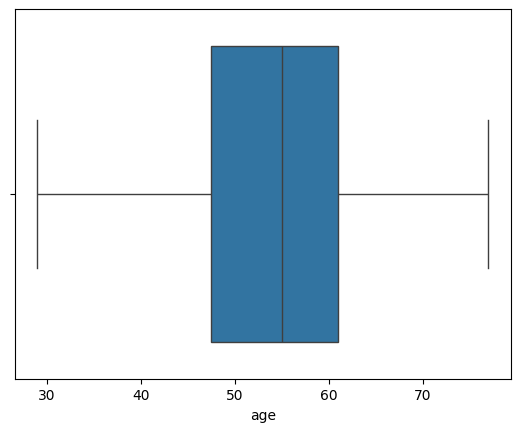

In [17]:
sns.boxplot(x=df['age']);

- No outliers

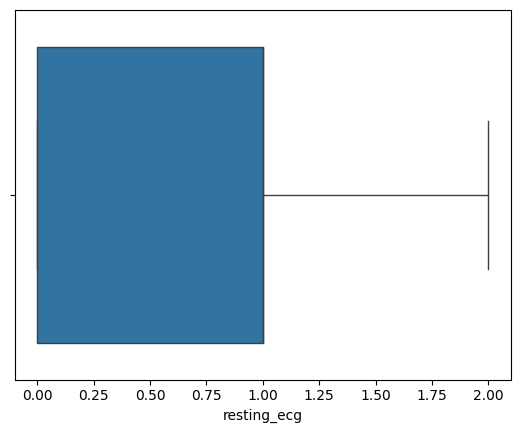

In [18]:
sns.boxplot(x=df['resting_ecg']);

- No outlier

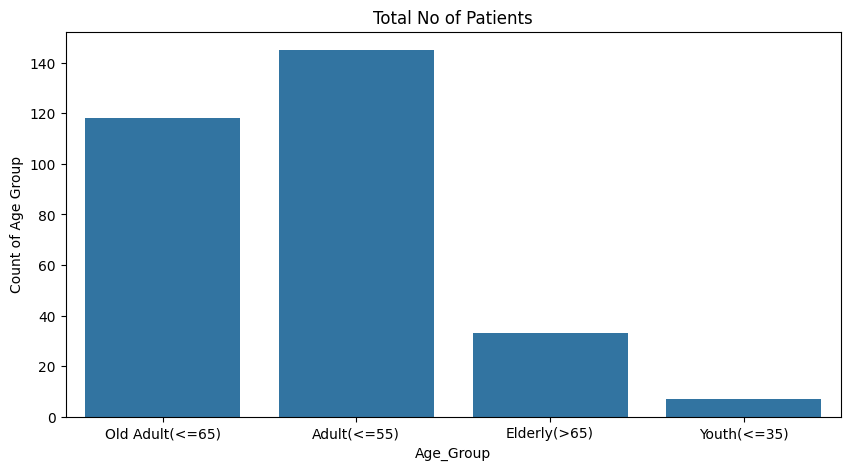

In [19]:
# Age Group

def Age_Group(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly(>65)'
df['Age_Group'] = df['age'].apply(Age_Group)

# Patients Age Group Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='Age_Group', data=df)
plt.xlabel('Age_Group')
plt.ylabel('Count of Age Group')
plt.title('Total No of Patients');

In the dataset,
- Most patients were adults(<=55), followed by old adults(<=65)
- The least age group were the youth(<=35)

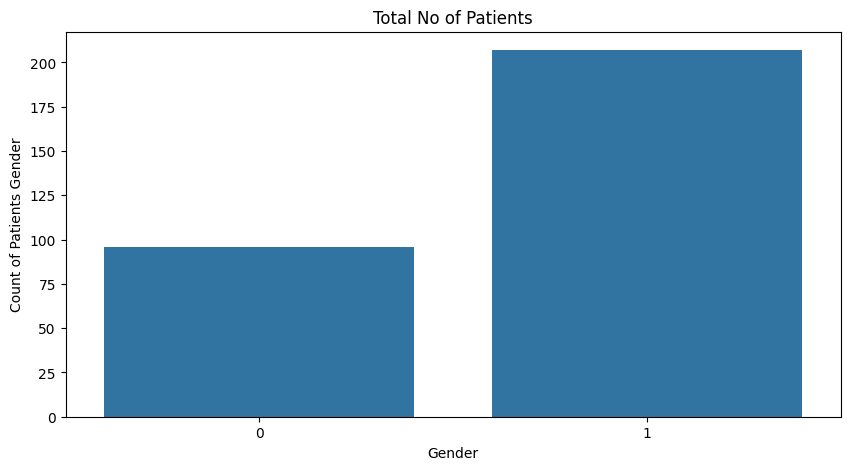

In [20]:
def Gender(gender):
    if gender == 1:
        return 'M'
    else:
        return 'F'

# Patients Gender Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total No of Patients');

- Above 2/3 of the patients were male (above 200)

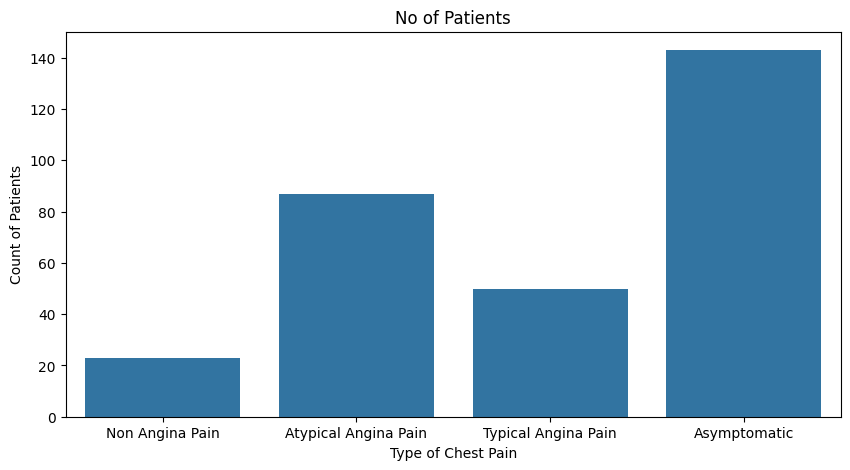

In [21]:
def chest_pain(cp):
    if cp == 1:
        return 'Typical Angina Pain'
    elif cp == 2:
        return 'Atypical Angina Pain'
    elif cp == 3:
        return 'Non Angina Pain'
    else:
        return 'Asymptomatic'
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# Visualization of Patients with chest Pain
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Patients')
plt.title('No of Patients');

- Most patients have asyptomatic type of chest pain (above 140)
- About 90 have atypical anginal pain
- About 50 patients have typical anginal pain while just above 20 got non angina pain

Target_Label
Yes    165
No     138
Name: count, dtype: int64


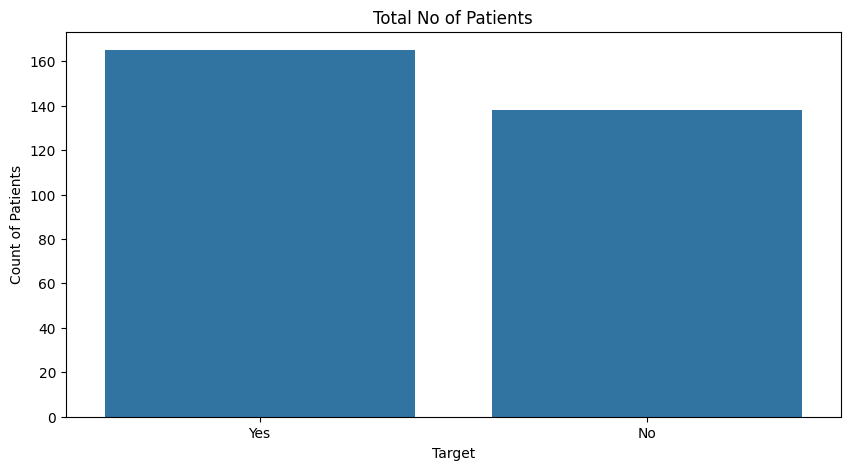

In [22]:
def label(Tg):
    if Tg == 1:
        return 'Yes'
    else:
        return 'No'
df['Target_Label'] = df['target'].apply(label)
plt.figure(figsize=(10,5))
sns.countplot(x='Target_Label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of Patients')
plt.title('Total No of Patients')
print(df['Target_Label'].value_counts())
df;

- Most of the patients in the case study have heart disease

### Bivariate Analysis

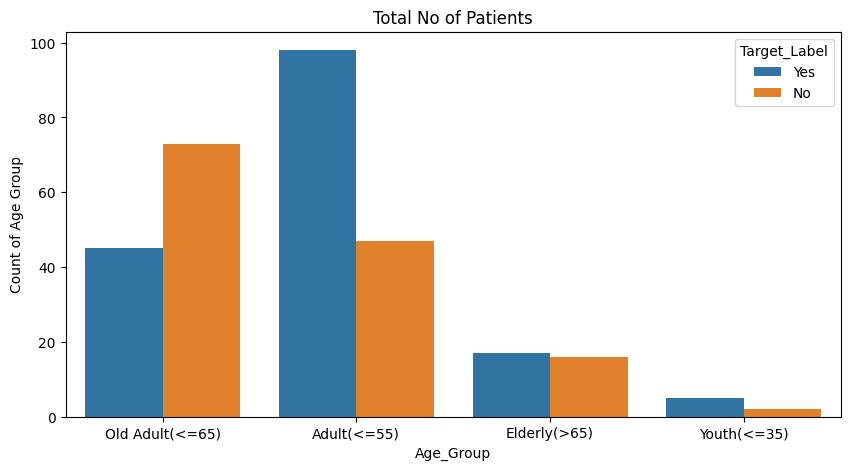

In [23]:
# Visualization of Patients Age Group with Target
plt.figure(figsize=(10,5))
sns.countplot(x='Age_Group', data=df, hue='Target_Label' )
plt.xlabel('Age_Group')
plt.ylabel('Count of Age Group')
plt.title('Total No of Patients');

- Among all age groups, except youth(<=35), more patients have heart disease than those who do not have.

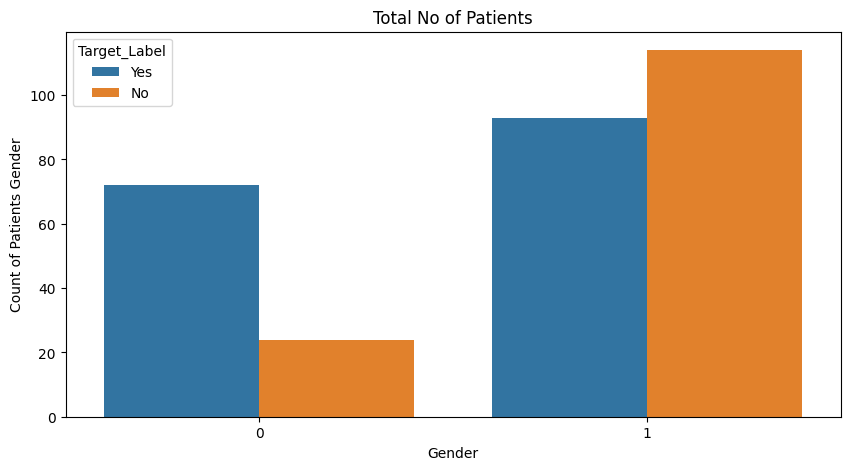

In [24]:
# Visualization of Patients Gender with Target
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='Target_Label')
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total No of Patients');

- Among male patients, most of male patients did not have disease, while among females, most patients have the disease

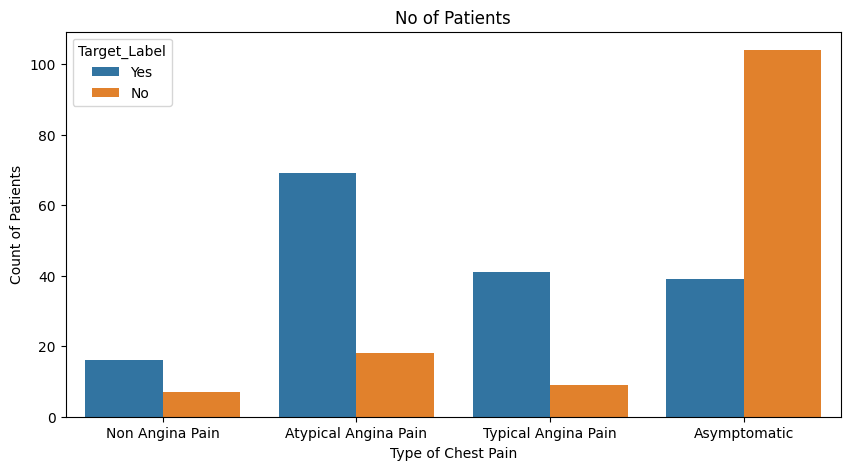

In [25]:
# Visualization of Patients with chest Pain/Target
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='Target_Label')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Patients')
plt.title('No of Patients');

### Multivariate Analysis

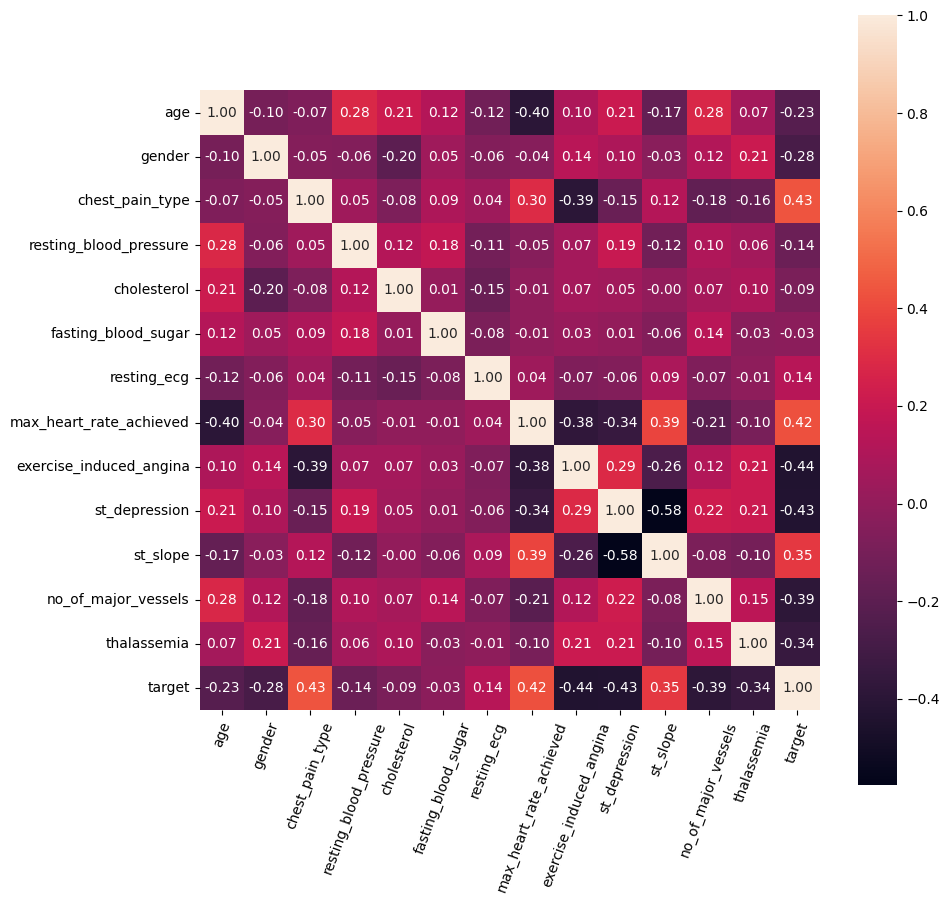

In [26]:
# Correlation between Target and other variables in the dataset

df1 = df[['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 
              'st_slope', 'no_of_major_vessels', 'thalassemia', 'target']]
plt.figure(figsize=(10,10))
hm = sns.heatmap(df1.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})
plt.xticks(rotation=70)
plt.show()

### Feature Engineering/Data Pre-Processsing

In [27]:
df2 = df1[['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 
              'st_slope', 'no_of_major_vessels', 'thalassemia']]

Label =df[['target']]

In [28]:
df2.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,no_of_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
Label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [30]:
df2.dtypes

age                          int64
gender                       int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
no_of_major_vessels          int64
thalassemia                  int64
dtype: object

In [31]:
# Deal wit Outliers - Normalize the features with outliers using MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
num_var = df2[['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'thalassemia']]
scaler.fit(num_var)

# Save the scaler
with open('numh_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### Machine Learning and Model Building

In [32]:
def preprocess_data(df):
    # Define the expected numerical columns
    expected_columns = ['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'thalassemia']
    
    # Check if the expected columns exist in the DataFrame
    missing_columns = [col for col in expected_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Missing columns in input: {missing_columns}")
        return df  # Return the original DataFrame to avoid further issues
    
    # Select numerical variables
    numerical_var = df[expected_columns]
    
    # Scale numerical entries
    scaled_num = scaler.transform(numerical_var)
    
    # Create a DataFrame with scaled column names
    scaled_num_df = pd.DataFrame(scaled_num, columns=['scaled_rbp', 'scaled_chol', 'scaled_mhr', 'scaled_thal'])
    
    # Drop the original numerical columns
    df = df.drop(columns=expected_columns)
    
    # Merge scaled features back to the DataFrame
    df = pd.concat([scaled_num_df, df], axis=1)
    
    return df


In [33]:
# Apply preprocessing before splitting
df_processed = preprocess_data(df2)

In [34]:
list[df_processed.columns]

list[Index(['scaled_rbp', 'scaled_chol', 'scaled_mhr', 'scaled_thal', 'age',
       'gender', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'no_of_major_vessels'],
      dtype='object')]

In [35]:
df_processed.head()

,scaled_rbp,scaled_chol,scaled_mhr,scaled_thal,age,gender,chest_pain_type,fasting_blood_sugar,resting_ecg,exercise_induced_angina,st_depression,st_slope,no_of_major_vessels
0,0.481132,0.244292,0.603053,0.333333,63,1,3,1,0,0,2.3,0,0
1,0.339623,0.283105,0.885496,0.666667,37,1,2,0,1,0,3.5,0,0
2,0.339623,0.178082,0.770992,0.666667,41,0,1,0,0,0,1.4,2,0
3,0.245283,0.251142,0.816794,0.666667,56,1,1,0,1,0,0.8,2,0
4,0.245283,0.520548,0.702290,0.666667,57,0,0,0,1,1,0.6,2,0


In [36]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_processed, Label, test_size=0.2, random_state=42)

In [37]:
# Logistic Regression Model Building

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


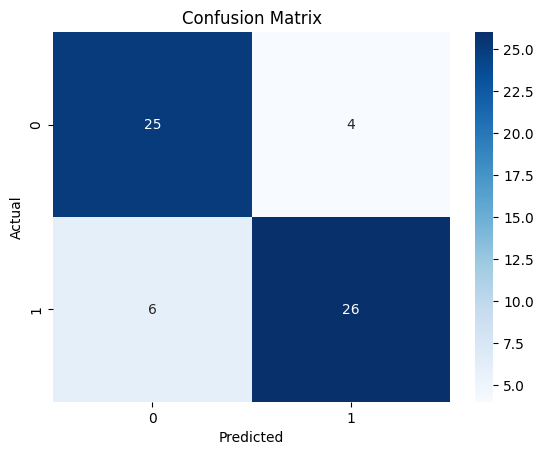

In [38]:
# Create a Confusion Matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Random Forest Classifier Model Building

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


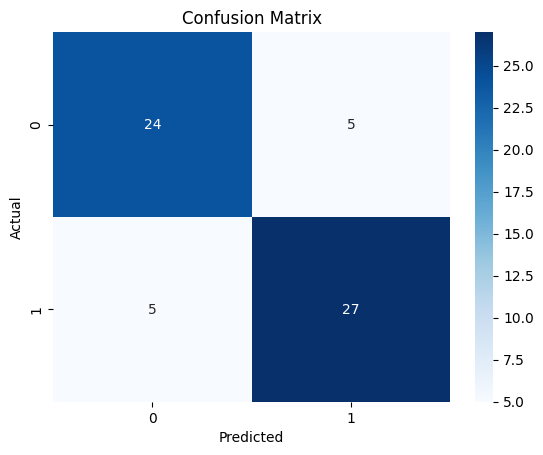

In [40]:
# Create a Confusion Matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Build 8 various Machine Learning Models with one Code

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

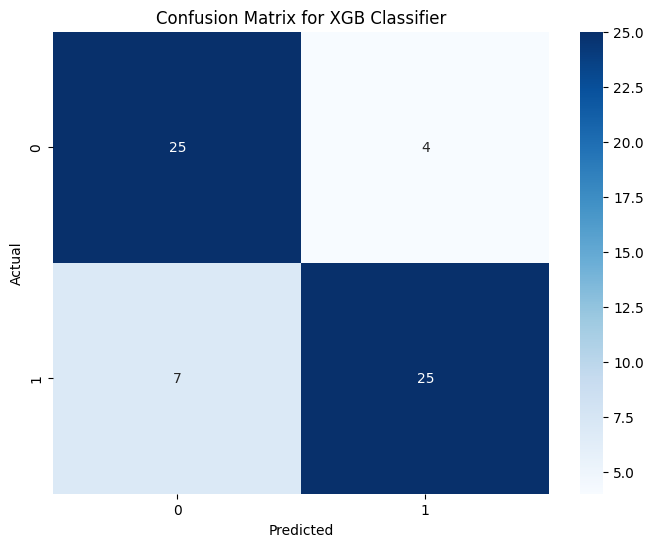

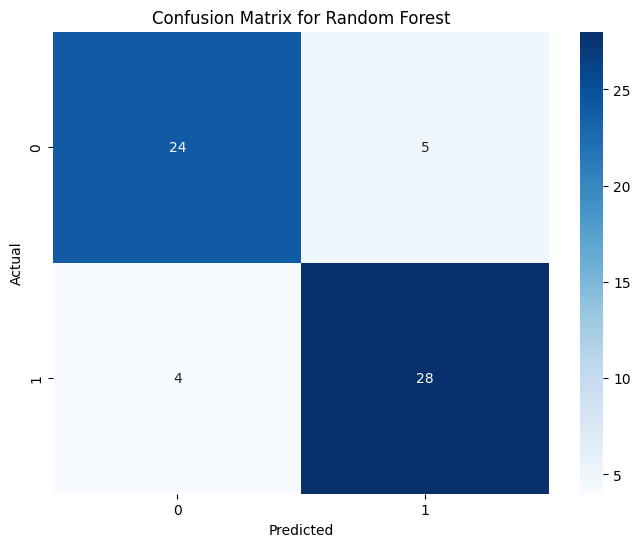

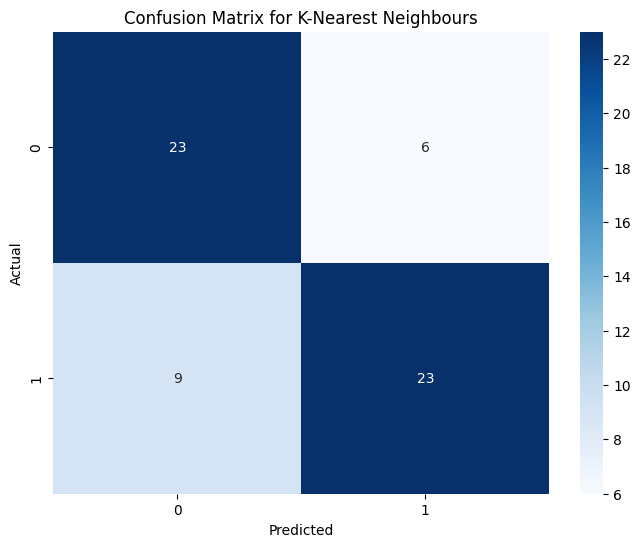

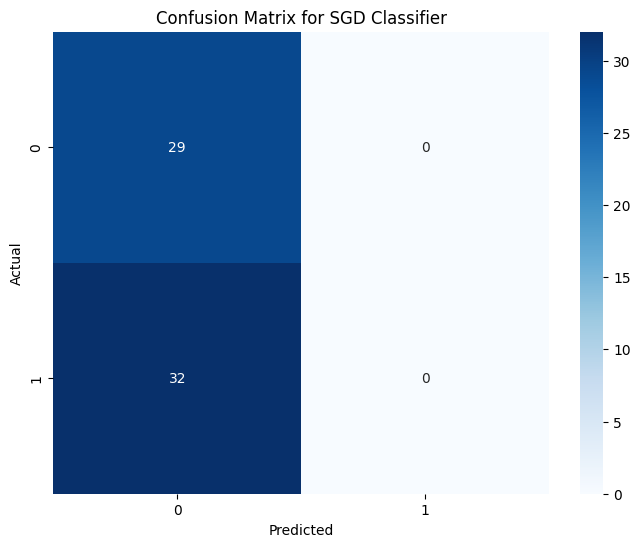

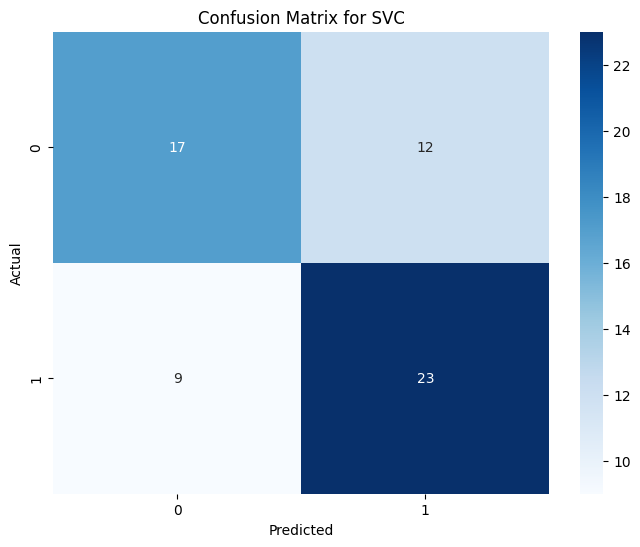

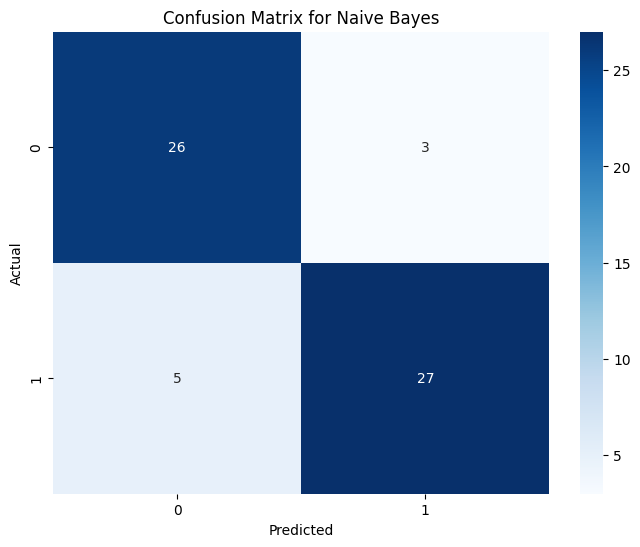

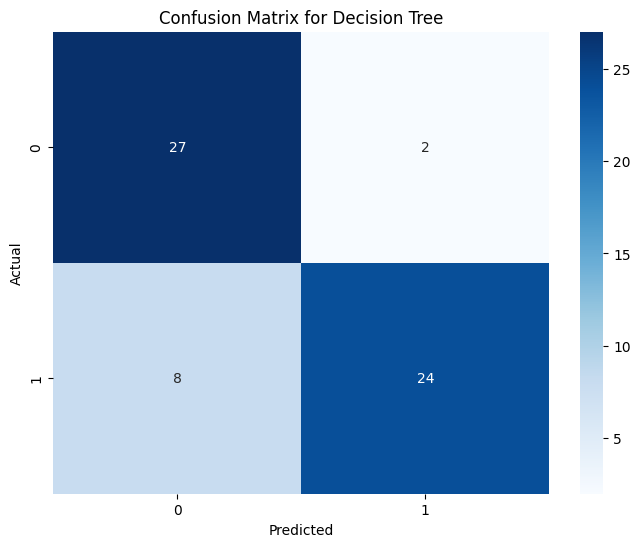

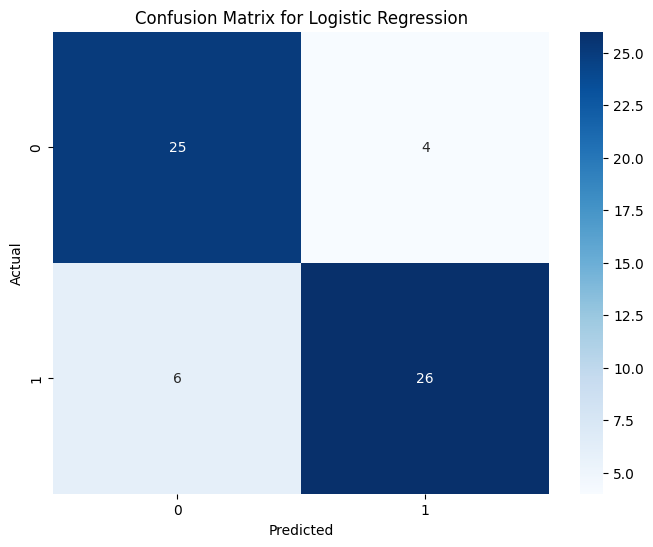

In [42]:
# Evaluation Metrics

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
cm_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    if model_name != classifier[-1][1]:
        print('')

    if model_name == 'Naive Bayes':
        model_filename = model_name.replace(" ", "_").lower() + '_mod.pkl'
        with open('naive_bayes_mod.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred)
    cm_list[model_name] = cm
    
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [43]:
print('Accuracy Score')
S1 = pd.DataFrame(acc_list)
S1

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,85.25%,75.41%,47.54%,65.57%,86.89%,83.61%,83.61%


In [44]:
print('Precision')
S2 = pd.DataFrame(precision_list)
S2

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,84.85%,79.31%,0.0%,65.71%,90.0%,92.31%,86.67%


In [45]:
print('Recall')
S3 = pd.DataFrame(recall_list)
S3

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,87.5%,71.88%,0.0%,71.88%,84.38%,75.0%,81.25%


In [46]:
print('ROC Score')
S4 = pd.DataFrame(roc_list)
S4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,85.13%,75.59%,50.0%,65.25%,87.02%,84.05%,83.73%


In [47]:
 # Combine the metric results into a DataFrame

# Data for each metric
accuracy = [81.97, 85.25, 75.41, 59.02, 65.57, 86.89, 85.25, 85.25]
precision = [86.21, 84.85, 79.31, 81.82, 65.71, 90.0, 92.59, 87.1]
recall = [78.12, 87.5, 71.88, 28.12, 71.88, 84.38, 78.12, 84.38]
roc_score = [82.17, 85.13, 75.59, 60.61, 65.25, 87.02, 85.61, 85.29]

# Model names
models = ['XGB Classifier', 'Random Forest', 'K-Nearest Neighbors', 'SGD Classifier', 
          'SVC', 'Naive Bayes', 'Decision Tree', 'Logistic Regression']

# Create a DataFrame
metrics_summary = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracy,
    'Precision (%)': precision,
    'Recall (%)': recall,
    'ROC Score (%)': roc_score
})

# Display the table
print(metrics_summary)

                 Model  Accuracy (%)  Precision (%)  Recall (%)  ROC Score (%)
0       XGB Classifier         81.97          86.21       78.12          82.17
1        Random Forest         85.25          84.85       87.50          85.13
2  K-Nearest Neighbors         75.41          79.31       71.88          75.59
3       SGD Classifier         59.02          81.82       28.12          60.61
4                  SVC         65.57          65.71       71.88          65.25
5          Naive Bayes         86.89          90.00       84.38          87.02
6        Decision Tree         85.25          92.59       78.12          85.61
7  Logistic Regression         85.25          87.10       84.38          85.29


In [48]:
# Save the Numerical Scaler
with open('numh_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [49]:
# Load the scaler and model
with open('numh_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('naive_bayes_mod.pkl', 'rb') as file:
    model = pickle.load(file)

def preprocess_input_data(raw_df):
    processed_df = transform_data(processed_df)
    
    return processed_df

def transform_data(df):
    # Define the expected numerical columns
    expected_columns = ['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'thalassemia']
    
    # Check if the expected columns exist in the DataFrame
    missing_columns = [col for col in expected_columns if col not in df.columns]
    
    if missing_columns:
        st.error(f"Missing columns in input: {missing_columns}")
        return df  # Return the original DataFrame to avoid further issues
    
    # Select numerical variables
    numerical_var = df[expected_columns]
    
    # Scale numerical entries
    scaled_num = scaler.transform(numerical_var)
    
    # Create a DataFrame with scaled column names
    scaled_num_df = pd.DataFrame(scaled_num, columns=['scaled_rbp', 'scaled_chol', 'scaled_mhr', 'scaled_thal'])
    
    # Drop the original numerical columns
    df = df.drop(columns=expected_columns)
    
    # Merge scaled features back to the DataFrame
    df = pd.concat([scaled_num_df, df], axis=1)
    
    return df

                    Feature  Importance
4                       age    4.316065
10            st_depression    0.989212
6           chest_pain_type    0.836311
12      no_of_major_vessels    0.745878
11                 st_slope    0.416362
9   exercise_induced_angina    0.413465
5                    gender    0.290198
2                scaled_mhr    0.134642
3               scaled_thal    0.134212
8               resting_ecg    0.089398
0                scaled_rbp    0.033199
1               scaled_chol    0.013953
7       fasting_blood_sugar    0.000621


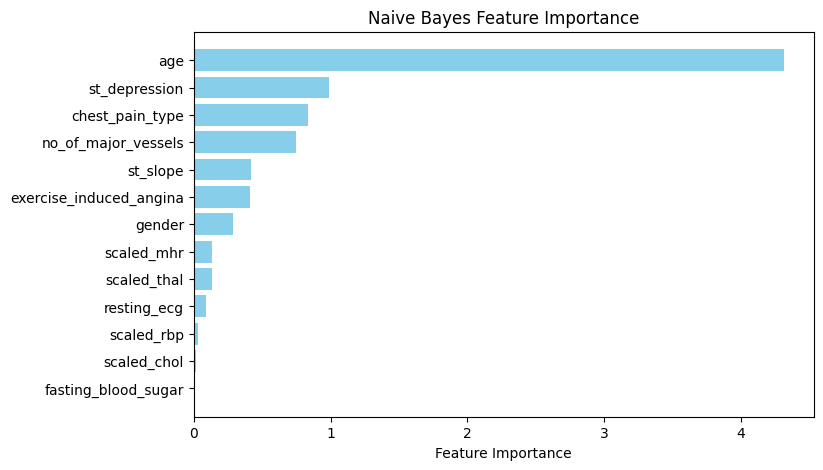

In [51]:
# Calculate feature importance
# Assuming your feature names are available (same as training features)

feature_names = ['scaled_rbp', 'scaled_chol', 'scaled_mhr', 'scaled_thal', 
                 'age', 'gender', 'chest_pain_type', 'fasting_blood_sugar',
                 'resting_ecg', 'exercise_induced_angina', 'st_depression',
                 'st_slope', 'no_of_major_vessels']


if hasattr(model, 'feature_log_prob_'):
    # For MultinomialNB or similar models
    feature_log_probs = model.feature_log_prob_
    
    # Taking the difference between the classes for each feature (only for binary classification)
    if feature_log_probs.shape[0] == 2:  # Binary classification
        feature_importance = np.abs(feature_log_probs[0] - feature_log_probs[1])
    else:
        # For multiclass, you can compute importance in other ways (max-min across classes)
        feature_importance = np.max(feature_log_probs, axis=0) - np.min(feature_log_probs, axis=0)
    
elif hasattr(model, 'theta_'):
    # For GaussianNB
    means = model.theta_
    if means.shape[0] == 2:  # Binary classification
        feature_importance = np.abs(means[0] - means[1])
    else:
        feature_importance = np.max(means, axis=0) - np.min(means, axis=0)

# Create a DataFrame to visualize the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Naive Bayes Feature Importance')
plt.gca().invert_yaxis() 
plt.show()